In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Inspect the number of tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station
# reflect the tables

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

#  Exploratory Precipitation Analysis

In [10]:
engine.execute('SELECT measurement.date, measurement.prcp FROM measurement WHERE measurement.date BETWEEN "2016/08/23" AND "2017/08/23" LIMIT 10').fetchall()

[('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0)]

In [11]:
session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016/08/23', '2017/08/17'))

In [12]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).\
order_by(Measurement.date.desc()).first()

most_recent

('2017-08-23')

In [13]:
last_12 =(dt.datetime.strptime(most_recent[0], '%Y-%m-%d') - dt.timedelta(days=365)).date()
last_12

datetime.date(2016, 8, 23)

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

results = session.query(Measurement.date, 
                        Measurement.prcp).\
                  filter(Measurement.date > last_12).all()
results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

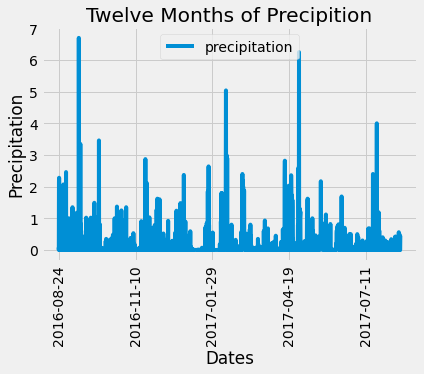

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

results = session.query(Measurement.date, 
                        Measurement.prcp).\
                  filter(Measurement.date > last_12).all()

# # Save the query results as a Pandas DataFrame and set the index to the date column. Sort the dataframe by date
df = pd.DataFrame(results, columns=['date', 'precipitation']).fillna(0).sort_values(by='date', ascending=True)
df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data

ax = df.plot(rot=90, x_compat=True)
figsize=(30,10)
plt.xlabel('Dates')
plt.ylabel('Precipitation')
plt.title('Twelve Months of Precipition')
plt.grid(True)

plt.savefig("12_Months_Precipitation_Data.png")


plt.show()

In [18]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
df.describe(include='all')  

,precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


#  Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [20]:
 # Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order. ***In other words, count the number of
# times a station was recorded in measurements, list the 9 stations and the count of each station it was listed.***
session.query(Measurement.station, func.count(
    Measurement.station)).group_by(
    Measurement.station).order_by(
    func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.count(
    Measurement.station), func.min(
    Measurement.tobs), func.max(
    Measurement.tobs), func.avg(
    Measurement.tobs)).group_by(
    Measurement.station).order_by(
    func.count(Measurement.station).desc()).first()

('USC00519281', 2772, 54.0, 85.0, 71.66378066378067)

In [34]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [36]:
# Find the most recent date for Station USC00519281

usc_00519281_recent_date = session.query(Measurement.date).filter(
    Measurement.station == 'USC00519281').order_by(
    Measurement.date.desc()).first()

usc_00519281_recent_date

('2017-08-18')

In [37]:
# Find the date that is exactly one year from USC00519281 most recent date

usc_00519281_last_12 =(dt.datetime.strptime(usc_00519281_recent_date[0], '%Y-%m-%d') - dt.timedelta(days=365)).date()

usc_00519281_last_12

datetime.date(2016, 8, 18)

In [38]:
session.query(Measurement.date, Measurement.tobs).filter(
    Measurement.date > usc_00519281_last_12).filter(
    Measurement.station == 'USC00519281').order_by(
    Measurement.station.desc()).all()

[('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-

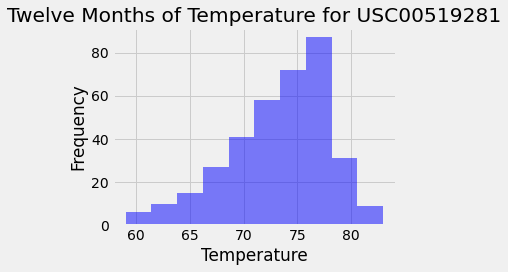

In [39]:
# Create the histogram that shows the last 12 months of temperature for USC00519281

usc00519281_temp = session.query(Measurement.date, Measurement.tobs).filter(
    Measurement.date > usc_00519281_last_12).filter(
    Measurement.station == 'USC00519281').order_by(
    Measurement.station.desc()).all()

# # Save the query results as a Pandas DataFrame and set the index to the date column. Sort the dataframe by date
usc00519281_temp_df = pd.DataFrame(usc00519281_temp, columns=['date', 'temperature']).fillna(0).sort_values(by='date', ascending=True)

usc00519281_temp_df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data

usc00519281_temp_df.hist(column='temperature', color='blue', alpha=0.5)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Twelve Months of Temperature for USC00519281')
plt.grid(True)
plt.tight_layout()

plt.savefig("12_Months_of_Temperature_for_USC00519281.png")

plt.show()

# Close session

In [40]:
# Close Session
session.close()